In [ ]:
#Measure the correlation between two variables of your corpus (e.g. length of texts/length of summaries) a. How can the p-value be increased if it is not significant?
#Eliminate subterritant data
#Increase data
#Split this corpus in test and train
#==the corpus coqa has already splitted into two part train and valid
#Evaluate its corpus with the adapted metrics
#Propose a metric for its corpus other than the task metrics



In [2]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [18]:
pip install spacy


     |████████████████████████████████| 6.7 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 409 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 494 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 934 kB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 5.7 MB/s  eta 0:00:01
     |████████████████████████████████| 182 kB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.7 MB/s  eta 0:00:01
     |████████████████████████████████| 154 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 9.1 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 4

--------------------------------
mode: two-sided
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14
--------------------------------
mode: greater
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14
--------------------------------
mode: less
Pearson: +7.8765e-02; p-value: +2.1983e-11
Spearman: +8.9342e-02; p-value: +3.0948e-14


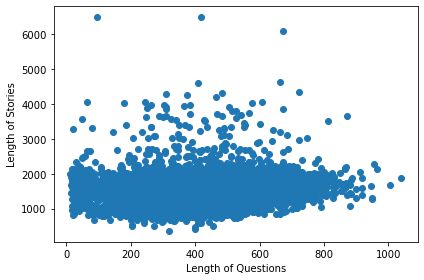

In [14]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

data_path = 'coqa_train.csv'
coqa_data = pd.read_csv(data_path)

question_lengths = []
story_lengths = []

for idx, row in coqa_data.iterrows():
    questions = eval(row['questions'])
    story = row['story']
    
    story_length = len(story)  
    for question in questions:
        question_length = len(question)  
        question_lengths.append(question_length)
        story_lengths.append(story_length)


question_lengths = np.array(question_lengths)
story_lengths = np.array(story_lengths)


for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    corr, p = scipy.stats.pearsonr(question_lengths, story_lengths)
    print(f"Pearson: {corr:+.4e}; p-value: {p:+.4e}")
    corr, p = scipy.stats.spearmanr(question_lengths, story_lengths)
    print(f"Spearman: {corr:+.4e}; p-value: {p:+.4e}")


plt.scatter(question_lengths, story_lengths)
plt.xlabel("Length of Questions")
plt.ylabel("Length of Stories")
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Assume this data is already loaded and processed
question_lengths = np.array([...])  # array from previous calculation
story_lengths = np.array([...])     # array from previous calculation

def lancer_n_pieces(n=16, p=0.5):
    a = np.random.random(n)
    a = np.array(a >= p, dtype=np.int8)
    return a

n = 16  # Using smaller n for demonstration; adjust as needed
x = []
y = []

# Adjusting probabilities based on the question/story length ratio
for ql, sl in zip(question_lengths, story_lengths):
    if sl == 0: continue  # Avoid division by zero
    prob = ql / sl
    prob = np.clip(prob, 0.01, 0.99)  # Ensuring prob stays within bounds
    serie_n_pieces = lancer_n_pieces(n=n, p=prob)
    result = scipy.stats.binomtest(k=sum(serie_n_pieces), n=n, p=0.5)
    print(f"n: {n}; ql/sl: {prob:.4f}; p-value: {result.pvalue:+.4e}")
    x.append(prob)
    y.append(result.pvalue)

plt.scatter(x, y)
plt.xlabel("Ratio of Question Length to Story Length")
plt.ylabel("p-value")
plt.title(f"Number of throws: {n}")
plt.show()


TypeError: unsupported operand type(s) for /: 'ellipsis' and 'ellipsis'

In [16]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

question_lengths = np.array(question_lengths)
story_lengths = np.array(story_lengths)

def lancer_n_pieces(n=16, p=0.5):
    a = np.random.random(n)
    a = np.array(a >= p, dtype=np.int8)
    return a

n = 16  # Using smaller n for demonstration; adjust as needed
x = []
y = []

# Adjusting probabilities based on the question/story length ratio
for ql, sl in zip(question_lengths, story_lengths):
    if sl == 0: continue  # Avoid division by zero
    prob = ql / sl
    prob = np.clip(prob, 0.01, 0.99)  # Ensuring prob stays within bounds
    serie_n_pieces = lancer_n_pieces(n=n, p=prob)
    result = scipy.stats.binomtest(k=sum(serie_n_pieces), n=n, p=0.5)
    print(f"n: {n}; ql/sl: {prob:.4f}; p-value: {result.pvalue:+.4e}")
    x.append(prob)
    y.append(result.pvalue)

plt.scatter(x, y)
plt.xlabel("Ratio of Question Length to Story Length")
plt.ylabel("p-value")
plt.title(f"Number of throws: {n}")
plt.show()


TypeError: unsupported operand type(s) for /: 'ellipsis' and 'ellipsis'

In [21]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_core_web_lg")

def calculate_acs(conversations):
    continuity_scores = []
    
    for conversation in conversations:
        ref_counts = 0
        total_answers = 0
        entities_in_previous_answers = set()
        
        for answer in conversation['answers']:
            doc = nlp(answer)
            entities_in_answer = set([ent.text for ent in doc.ents])
            shared_entities = entities_in_answer.intersection(entities_in_previous_answers)
            ref_counts += len(shared_entities)
            entities_in_previous_answers.update(entities_in_answer)
            total_answers += 1
        
        continuity_score = ref_counts / total_answers if total_answers > 0 else 0
        continuity_scores.append(continuity_score)
    
    return np.mean(continuity_scores)

# Example usage with dummy data
conversations = [
    {'answers': ["The Vatican Library is located in Vatican City.", "It was established in 1475, making it one of the oldest libraries.", "The library holds many ancient texts."]},
    {'answers': ["Hard Rock Cafe hosted the auction.", "They sold a famous glove for $2 million.", "The glove was bought by someone from Macau."]}
]

average_acs = calculate_acs(conversations)
print(f"Average Answer Continuity Score: {average_acs:.2f}")


OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.